В этом ноутбуке я строю довольно простую глубокую нейросеть при помощи библиотеки Keras, чтобы классифицировать рукописные изображения цифв в известном датасете Mnist.

In [ ]:
# Импортируем библиотеки функций. Keras, наверно, самая известная библиотека
# для построения нейронных сетей. https://keras.io/
#             За эту полосу не выходим из вежливости к другим разработчикам.  ->
import keras
from keras.datasets import mnist

In [ ]:
# Загружаем данные из библиотеки Keras. Можно использовать свои данные,
# но их сначала надо подготовить. Обычно библиотеки для машин-лернинга
# содержат несколько готовых датасетов, чтобы на них потренироваться
# запускать разные функции.
# Во фразе "machine learning" слово лернинг отвечает за обучение.
# Сначала нам надо обучить (learn) классификатор,
# на тренировочном наборе (train set), а потом проверить, как хорошо
# он обучился на тестовом наборе (test set).
# Ответы, то есть числа, которые нарисованы на картинке,
# хранятся в y_train и y_test.
# Откуда берется терминология декартовых координат (оси X и Y) -
# отдельная тема.
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

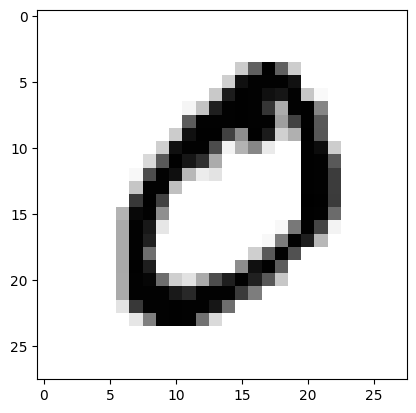

In [ ]:
# Датасет mnist - это известнейший набор для компьютерного зрения.
# Он содержит 70К вручную написанных цифр от 0 до 9.
# Mnist стал известен, благодаря французкому ученому Яну Лекуну.
# https://en.wikipedia.org/wiki/Yann_LeCun
# Он первый сотоварищи предложил архитектуру нейронной сети,
# которая распознавала числа из mnist наравне с человеком.
# Архитектуру назвали Convolutional neural network
# (сверточная нейронная сеть).
# Изображения черно-белые, 28х28 пикселей. Можно их посмотреть:
import matplotlib.pyplot as plt
plt.imshow(x_train[1], cmap=plt.get_cmap('binary'))

In [ ]:
# Построим несложный машинный классификатор, который будет определять,
# какое число изображено на картинке из датасета.
# Импортируем функции для создания слоев сети.
from keras.models import Sequential
from keras.layers import Dense, Dropout

In [ ]:
# Создаем сеть: накладываем пару слоев друг на друга.
# Таких сетей в тырнете много. Главное, правильно выставить им параметры,
# чтобы именно ваши данные в них можно было засунуть.
# Кто догадается, почему именно такие числа выставлены сейчас в параметрах сети,
# тот - большой молодец. (Вспомните признаки нашего датасета.)
model = Sequential()
model.add(Dense(397, input_shape = (784,), activation = "sigmoid"))
model.add(Dropout(0.3))
model.add(Dense(175, activation = "relu"))
model.add(Dense(10, activation = "softmax"))

In [ ]:
# "Компайлим" "модельку" - передаем все параметры функции, которая добавит
# еще несколько параметров, о которых надо говорить отдельно.
# В основном они связаны с контролем над процессом обучения
# при переходе от слоя к слою.
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
# Прежде чем пихать датасет в нейронку, его тоже надо немного переделать.
# Картинка 28*28 - это список из 28 рядов целых чисел от 0 до 255.
# А машинные классификаторы едят в основном вектора вида (0, 3, 2, 0, ...),
# то есть одномерные ряды чисел: по одному ряду для каждого экземпляра класса.
# Шаманим датасет, чтобы он был списком векторов.
# (Вдалеке раздаются звуки шаманского бубна.)
trainX = x_train.reshape(-1, 784)
testX = x_test.reshape(-1, 784)

In [ ]:
# Теперь надо подшаманить классы - ответы (какое число нарисовано),
# которые содержатся в y_train и y_test. Форма у них сейчас такая:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [ ]:
# А надо тоже векторную - так просит keras.
# Импортнем для этого еще одну великую библиотеку TensorFlow.
import tensorflow
from tensorflow.keras.utils import to_categorical
num_classes = 10
trainY_for_keras = tensorflow.keras.utils.to_categorical(y_train, num_classes)
testY_for_keras = tensorflow.keras.utils.to_categorical(y_test, num_classes)

In [ ]:
# Получилось так: каждый ответ - это вектор, где 1 стоит на позиции,
# обозначающей искомое число. Нулевая, значит, 0 и т.д.
trainY_for_keras

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [ ]:
# Теперь будем "фитить" нашу "модельку", т.е. скормим ей наши данные,
# чтобы она прогнала их через все слои и настроила свои "веса" (weights).
# Весь цимес моделек именно в весах.
# Что они такое на самом деле - это надо отдельно обсуждать.
model.fit(trainX,
          trainY_for_keras,
          batch_size=128,
          epochs=5,
          validation_split=0.1)

Epoch 1/5
422/422 [==============================] - 14s 29ms/step - loss: 0.5326 - accuracy: 0.8313 - val_loss: 0.2431 - val_accuracy: 0.9295
Epoch 2/5
422/422 [==============================] - 8s 18ms/step - loss: 0.3546 - accuracy: 0.8887 - val_loss: 0.2001 - val_accuracy: 0.9415
Epoch 3/5
422/422 [==============================] - 6s 14ms/step - loss: 0.3142 - accuracy: 0.9004 - val_loss: 0.1776 - val_accuracy: 0.9452
Epoch 4/5
422/422 [==============================] - 7s 16ms/step - loss: 0.2935 - accuracy: 0.9086 - val_loss: 0.1678 - val_accuracy: 0.9497
Epoch 5/5
422/422 [==============================] - 6s 14ms/step - loss: 0.2670 - accuracy: 0.9155 - val_loss: 0.1420 - val_accuracy: 0.9582


In [ ]:
# Теперь пусть наша моделька предскажет число для векторов
# из тренировочного набора. Таким образом мы сможем проверить,
# насколько хорошо она обучилась.
predicted = model.predict(testX)

313/313 [==============================] - 2s 5ms/step


In [ ]:
# Посмотрим, что она напредсказывала. О бозецьки, што ето за страшные числа??
# Это вероятности принадлежности каждого вектора одному из 10 классов.
predicted

array([[1.3198236e-06, 9.8183818e-07, 1.2995090e-04, ..., 9.9975395e-01,
        3.8356964e-07, 2.3166001e-05],
       [8.3439802e-05, 2.1895049e-03, 9.9073046e-01, ..., 4.1557169e-06,
        5.4364587e-04, 4.9810780e-07],
       [1.7519605e-08, 9.9948508e-01, 5.5890096e-06, ..., 4.9967697e-04,
        1.6121910e-06, 1.0958137e-06],
       ...,
       [2.4085732e-06, 1.6534174e-06, 2.2028669e-05, ..., 1.1996836e-03,
        1.4641016e-03, 2.8002720e-02],
       [7.3815708e-04, 3.2731806e-04, 1.8436265e-07, ..., 1.5612924e-05,
        9.5194420e-03, 1.7575021e-05],
       [7.2075764e-04, 1.4200649e-05, 1.6580288e-03, ..., 5.8416202e-07,
        8.6146290e-05, 3.6706861e-06]], dtype=float32)

In [ ]:
# Переведем их в удобоваримую форму: используем функцию argmax -
# нахождение максимального значения в ряде чисел.
# Эта функция возвращает позицию в ряде, на которой оно находится.
import numpy as np
predicted_max=np.argmax(predicted, axis=1)

In [ ]:
# Вот такая красота у нас получилась:
predicted_max

array([7, 2, 1, ..., 4, 5, 6])

In [ ]:
# Теперь нам надо сравнить предсказанные моделью числа с правильными ответами.
# На первый взгляд моделька обучилась хорошо.
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [ ]:
# Но есть общепризнанные метрики, которые позволят сделать
# более точное сравнение. Используем еще одну великую библиотеку
# ScikitLearn:
from sklearn import metrics

In [ ]:
# Про f1_score нужно говорить отдельно, но чем он ближе к 1, тем лучше.
# А вот дальше "матрица конфузии" (матрица ошибок, confusion matrix)
# в принципе интуитивно понятно все объясняет.
print(metrics.f1_score(y_test, predicted_max, average='weighted'))
print(metrics.classification_report(y_test, predicted_max))
print(metrics.confusion_matrix(y_test, predicted_max))
# А есть модельки, у которых 100% успешность. Ну что, у кожаных нет и шанса? ;)

0.9488122215522435
              precision    recall  f1-score   support

           0       0.94      0.99      0.97       980
           1       0.97      0.99      0.98      1135
           2       0.95      0.94      0.95      1032
           3       0.93      0.94      0.93      1010
           4       0.96      0.94      0.95       982
           5       0.95      0.91      0.93       892
           6       0.96      0.95      0.96       958
           7       0.95      0.95      0.95      1028
           8       0.93      0.94      0.94       974
           9       0.94      0.93      0.93      1009

    accuracy                           0.95     10000
   macro avg       0.95      0.95      0.95     10000
weighted avg       0.95      0.95      0.95     10000

[[ 969    0    0    1    0    3    5    1    1    0]
 [   0 1125    3    1    0    2    2    0    2    0]
 [  10    1  973   11    3    1    3   11   19    0]
 [   2    2   13  953    0   14    0   13   12    1]
 [   2    